In [ ]:
# Libraries
from collections import deque
import heapq
import matplotlib.pyplot as plt

In [ ]:
# Q - 1

class CubeSolver:
    def __init__(self):
        self.directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    def read_cube_from_file(self, filename):
        cube = []
        with open(filename, 'r') as file:
            for line in file:
                row = line.strip().split()
                cube.append(row)
        return cube

    def is_valid_move(self, cube, row, col):
        n = len(cube)
        m = len(cube[0])
        return 0 <= row < n and 0 <= col < m and cube[row][col] != '1'

    def dfs(self, cube, start, end, visited, path):
        if start == end:
            return path + [start]

        visited.add(start)
        for direction in self.directions:
            next_row = start[0] + direction[0]
            next_col = start[1] + direction[1]
            if self.is_valid_move(cube, next_row, next_col) and (next_row, next_col) not in visited:
                result = self.dfs(cube, (next_row, next_col), end, visited, path + [start])
                if result:
                    return result
        return None

    def bfs(self, cube, start, end):
        queue = [(start, [start])]
        visited = set()

        while queue:
            current, path = queue.pop(0)
            if current == end:
                return path

            visited.add(current)
            for direction in self.directions:
                next_row = current[0] + direction[0]
                next_col = current[1] + direction[1]
                if self.is_valid_move(cube, next_row, next_col) and (next_row, next_col) not in visited:
                    queue.append(((next_row, next_col), path + [(next_row, next_col)]))
                    visited.add((next_row, next_col))
        return None

    def find_path_dfs(self, cube):
        start = None
        end = None
        for i in range(len(cube)):
            for j in range(len(cube[0])):
                if cube[i][j] == 'S':
                    start = (i, j)
                elif cube[i][j] == 'G':
                    end = (i, j)
        if not start or not end:
            return -1
        return self.dfs(cube, start, end, set(), [])

    def find_path_bfs(self, cube):
        start = None
        end = None
        for i in range(len(cube)):
            for j in range(len(cube[0])):
                if cube[i][j] == 'S':
                    start = (i, j)
                elif cube[i][j] == 'G':
                    end = (i, j)
        if not start or not end:
            return -1
        return self.bfs(cube, start, end)

# Example usage
solver = CubeSolver()
cube = solver.read_cube_from_file("cube.txt")
dfs_path = solver.find_path_dfs(cube)
bfs_path = solver.find_path_bfs(cube)
print("DFS Path:", dfs_path)
print("BFS Path:", bfs_path)

DFS Path: [(0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (2, 5), (3, 5), (4, 5), (4, 4), (5, 4), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0)]
BFS Path: [(0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (2, 5), (3, 5), (4, 5), (4, 4), (5, 4), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0)]



DFS


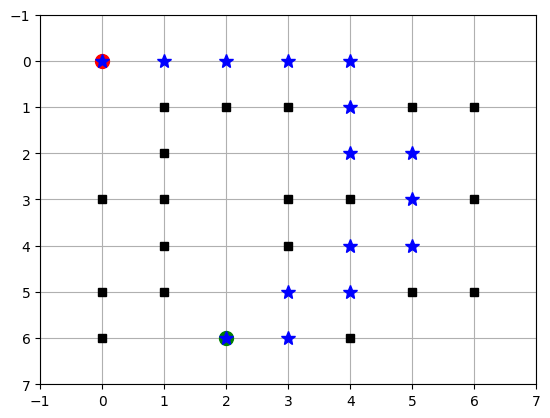



BFS


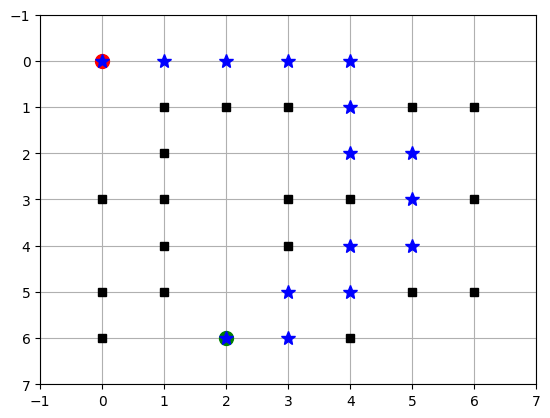

In [ ]:
def plot_cube(cube, path):
    for i in range(len(cube)):
        for j in range(len(cube[0])):
            if cube[i][j] == '1':
                plt.plot(j, len(cube) - i - 1, 'ks')
            elif cube[i][j] == 'S':
                plt.plot(j, len(cube) - i - 1, 'go', markersize=10)
            elif cube[i][j] == 'G':
                plt.plot(j, len(cube) - i - 1, 'ro', markersize=10)

    for node in path:
        plt.plot(node[1], len(cube) - node[0] - 1, 'b*-', markersize=10)

    plt.xlim(-1, len(cube[0]))
    plt.ylim(-1, len(cube))
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

print()
print("DFS")
plot_cube(cube, dfs_path)
print()
print()
print("BFS")
plot_cube(cube, bfs_path)

# The graph shown below is starting from green point and ending at red point

In [ ]:
class CubeSolverAStar:
    def __init__(self):
        self.directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    def read_cube_from_file(self, filename):
        cube = []
        with open(filename, 'r') as file:
            for line in file:
                row = line.strip().split()
                cube.append(row)
        return cube

    def is_valid_move(self, cube, row, col):
        n = len(cube)
        m = len(cube[0])
        return 0 <= row < n and 0 <= col < m and cube[row][col] != '1'

    def heuristic(self, current, goal):
        # Manhattan distance heuristic
        return abs(current[0] - goal[0]) + abs(current[1] - goal[1])

    def find_path_astar(self, cube):
        start = None
        end = None
        for i in range(len(cube)):
            for j in range(len(cube[0])):
                if cube[i][j] == 'S':
                    start = (i, j)
                elif cube[i][j] == 'G':
                    end = (i, j)
        if not start or not end:
            return -1

        pq = [(0, start)]
        visited = set()
        parent = {}
        g_score = {start: 0}

        while pq:
            current_cost, current = heapq.heappop(pq)
            if current == end:
                path = []
                while current in parent:
                    path.append(current)
                    current = parent[current]
                path.append(start)
                return path[::-1]

            visited.add(current)
            for direction in self.directions:
                next_row = current[0] + direction[0]
                next_col = current[1] + direction[1]
                if self.is_valid_move(cube, next_row, next_col) and (next_row, next_col) not in visited:
                    if cube[next_row][next_col] == '+':
                        new_cost = g_score[current] + 1
                    else:
                        new_cost = g_score[current]
                    if (next_row, next_col) not in g_score or new_cost < g_score[(next_row, next_col)]:
                        g_score[(next_row, next_col)] = new_cost
                        f_score = new_cost + self.heuristic((next_row, next_col), end)
                        heapq.heappush(pq, (f_score, (next_row, next_col)))
                        parent[(next_row, next_col)] = current
        return -1

# Example usage
solver = CubeSolverAStar()
cube = solver.read_cube_from_file("cubee.txt")
path = solver.find_path_astar(cube)
print("Path:", path)

Path: [(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (5, 4), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0)]


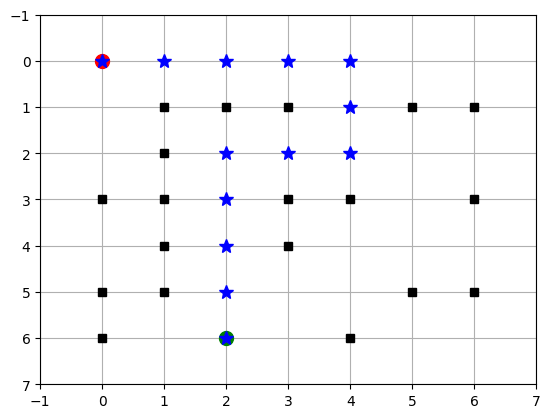

In [ ]:
plot_cube(cube, path)

# The graph shown below is starting from green point and ending at red point